# Imports

In [1]:
import LightPipes as lp
import numpy as np
import matplotlib.pyplot as plt

# Original Code

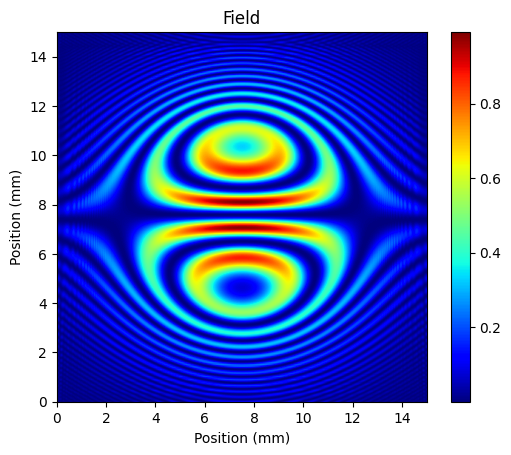

In [24]:
# Parameters
size = 15 * lp.mm # size of the grid
wave = 632.8 * lp.nm #wavelength of HeNe laser
N = 500 # number (NxN) of grid pixels

R = 7 * lp.mm # laser beam radius
z1 = 8 * lp.cm # length of arm 1
z2 = 7 * lp.cm # length of arm 2
z3 = 3 * lp.cm # distance laser to beamsplitter
z4 = 5 * lp.cm # distance beamsplitter to screen
Rbs = 0.5 # reflection beam splitter
tx = 0 * lp.mrad
ty = 0 * lp.mrad # tilt of mirror 1


# Generate a weak converging laser beam using a weak positive lens:
Field = lp.Begin(size, wave, N)
Field = lp.GaussBeam(Field, R)

#Propagate to the beamsplitter:
Field = lp.Forvard(Field, z3)

#Split the beam and propagate to mirror #2:
Field2 = lp.IntAttenuator(Field, 1-Rbs)
Field2 = lp.Forvard(Field2, z2)

#Introduce aberration and propagate back to the beamsplitter:
Field2 = lp.Tilt(Field2, tx, ty)
Field2 = lp.Zernike(Field2, 3, -1, 6 * lp.mm, A = 1.03*wave)
Field2 = lp.Forvard(Field2, z2)
Field2 = lp.IntAttenuator(Field2, Rbs)

#Split off the second beam and propagate to- and back from the mirror #1:
Field1 = lp.IntAttenuator(Field, Rbs)
Field1 = lp.Forvard(Field1, z1*2)
Field1 = lp.IntAttenuator(Field1, 1-Rbs)

#Recombine the two beams and propagate to the screen:
Field = lp.BeamMix(Field1, Field2)
Field = lp.Forvard(z4, Field)
I = lp.Intensity(1, Field)

# Draw the Field in 2D
I = lp.Intensity(Field, flag=0)

plt.imshow(I, extent=(0, size / lp.mm, 0, size / lp.mm), cmap="jet")
plt.colorbar()
plt.title("Field")
plt.xlabel('Position (mm)')
plt.ylabel('Position (mm)')
plt.show()


# Adding a lens

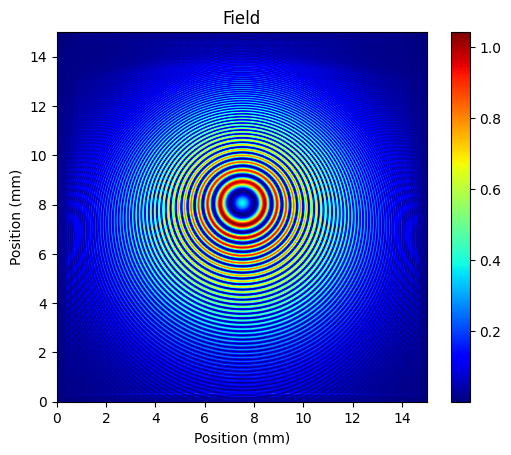

In [29]:
# Parameters
size = 15 * lp.mm # size of the grid
wave = 632.8 * lp.nm #wavelength of HeNe laser
N = 500 # number (NxN) of grid pixels

R = 7 * lp.mm # laser beam radius
z1 = 8 * lp.cm # length of arm 1
z2 = 7 * lp.cm # length of arm 2
z3 = 3 * lp.cm # distance laser to beamsplitter
z4 = 5 * lp.cm # distance beamsplitter to screen
Rbs = 0.5 # reflection beam splitter
tx = 0 * lp.mrad
ty = 0 * lp.mrad # tilt of mirror 1


# Generate a weak converging laser beam using a weak positive lens:
Field = lp.Begin(size, wave, N)
Field = lp.GaussBeam(Field, R)

#Propagate to the beamsplitter:
Field = lp.Forvard(Field, z3)

#Split the beam and propagate to mirror #2:
Field2 = lp.IntAttenuator(Field, 1-Rbs)
Field2 = lp.Forvard(Field2, z2)

#Introduce aberration and propagate back to the beamsplitter:
Field2 = lp.Tilt(Field2, tx, ty)
Field2 = lp.Zernike(Field2, 3, -1, 6 * lp.mm, A = 1.03*wave)
Field2 = lp.Forvard(Field2, z2)
Field2 = lp.IntAttenuator(Field2, Rbs)

# Introducing a Thin Lens in this arm
Field2 = lp.Lens(Field2, 1 * lp.m)

#Split off the second beam and propagate to- and back from the mirror #1:
Field1 = lp.IntAttenuator(Field, Rbs)
Field1 = lp.Forvard(Field1, z1*2)
Field1 = lp.IntAttenuator(Field1, 1-Rbs)

#Recombine the two beams and propagate to the screen:
Field = lp.BeamMix(Field1, Field2)
Field = lp.Forvard(z4, Field)
I = lp.Intensity(1, Field)

# Draw the Field in 2D
I = lp.Intensity(Field, flag=0)

plt.imshow(I, extent=(0, size / lp.mm, 0, size / lp.mm), cmap="jet")
plt.colorbar()
plt.title("Field")
plt.xlabel('Position (mm)')
plt.ylabel('Position (mm)')
plt.show()
